In [796]:
import pandas as pd
import os
import csv
from contextlib import nullcontext
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

In [797]:
# read the csv file / import the data

absolute_path = os.path.abspath('')
relative_path = "data/historical_field_goal_data.csv"
full_path = os.path.join(absolute_path, relative_path)
df = pd.read_csv(full_path)

In [798]:
# print a sample of the data

'''
print("HERE IS A SAMPLE OF THE DATA:")
print()
print(df.head())
'''

'\nprint("HERE IS A SAMPLE OF THE DATA:")\nprint()\nprint(df.head())\n'

In [799]:
# Prints the first row in a dome in the current df

'''
print()
print()
print()
print("HERE IS THE FIRST ROW IN A DOME")
print()
print(df.iloc[19,:])
'''

'\nprint()\nprint()\nprint()\nprint("HERE IS THE FIRST ROW IN A DOME")\nprint()\nprint(df.iloc[19,:])\n'

In [800]:
# Converts the null values in column 'temperature' to '0'
df['temperature'] = df['temperature'].fillna(0)

In [801]:
# Prints row 20 showing new values, temperatiure should now be 0
'''
print()
print()
print()
print("HERE IS THE FIRST ROW IN A DOME WITHOUT NULL TEMP")
print(df.iloc[19,:])
'''

'\nprint()\nprint()\nprint()\nprint("HERE IS THE FIRST ROW IN A DOME WITHOUT NULL TEMP")\nprint(df.iloc[19,:])\n'

In [802]:
# create a list of column names by using .columns
'''
list_of_column_names = list(df.columns)

# displaying the list of column names
print()
print("LIST OF COLUMN NAMES:")
print(list_of_column_names)
print()
print()
'''

'\nlist_of_column_names = list(df.columns)\n\n# displaying the list of column names\nprint()\nprint("LIST OF COLUMN NAMES:")\nprint(list_of_column_names)\nprint()\nprint()\n'

In [803]:
# creating new DataFrame to hold results from our analsyis
results_df = pd.DataFrame(list())

# writing empty DataFrame to the new csv file
results_df.to_csv('data/results_df.csv')

# defining a header row
first_row = ["criteria", "attempts_per_game", "fg_percent", "expected_fgs"]

with open('data/results_df.csv', 'w', newline='') as f:
    # create the csv writer
    writer = csv.writer(f)

    # write a row to the csv file
    writer.writerow(first_row)

In [804]:
#adding additional test rows
'''
test_row1 = ["x", "y", "z"]
test_row2 = ["apple", "banana", "orange"]

with open('data/results_df.csv', 'a', newline='') as f:
    # create the csv writer
    writer = csv.writer(f)

    # write a row to the csv file
    writer.writerow(test_row1)
    writer.writerow(test_row2)
'''

'\ntest_row1 = ["x", "y", "z"]\ntest_row2 = ["apple", "banana", "orange"]\n\nwith open(\'data/results_df.csv\', \'a\', newline=\'\') as f:\n    # create the csv writer\n    writer = csv.writer(f)\n\n    # write a row to the csv file\n    writer.writerow(test_row1)\n    writer.writerow(test_row2)\n'

In [805]:
#print the results csv
absolute_path_results = os.path.abspath('')
relative_path_results = "data/results_df.csv"
full_path_results = os.path.join(absolute_path_results, relative_path_results)

print_results_df = pd.read_csv(full_path_results)
print(print_results_df.head())

Empty DataFrame
Columns: [criteria, attempts_per_game, fg_percent, expected_fgs]
Index: []


In [806]:
#method to add results to results_df
def add_results_data(data):

    with open('data/results_df.csv', 'a', newline='', encoding='utf8') as f:
        # create the csv writer
        writer = csv.writer(f)

        # write row to the csv file
        writer.writerow(data)

In [807]:
#adding a test row to results.df
'''
results_data_to_add = ["cri", "att", "per", "exp"]
add_results_data(results_data_to_add)

print_results_df = pd.read_csv(full_path_results)
print(print_results_df.head())
'''

'\nresults_data_to_add = ["cri", "att", "per", "exp"]\nadd_results_data(results_data_to_add)\n\nprint_results_df = pd.read_csv(full_path_results)\nprint(print_results_df.head())\n'

In [808]:
# adding total game data
total_games = 2405

# calculating games with no fg's
games_with_fgs = df[['season', 'week', 'stadium']].drop_duplicates().shape[0]
games_with_no_fgs = total_games - games_with_fgs

#printing total number of games
print()
print("There were {} games from 2012-2020.".format(total_games))
print()
print()



There were 2405 games from 2012-2020.




In [809]:
# Providing user with information about our data set

print()
print("There are", df[['season', 'week', 'stadium']].drop_duplicates().shape[0], "games in our data set.")
print()
print()
print()
# Alternative code using len() instead of .shape()
#print("There are", len(df[['season', 'week', 'stadium']].drop_duplicates()), "games in our data set.")

print("This means there were {} games with no field goals or field goal attempts.".format(games_with_no_fgs))
print()
print()
print()
print("There were field goal attempts in {} percentage of the games and no field goal attempts in {} percentage of the games.".format(games_with_fgs/total_games, games_with_no_fgs/total_games))
print()
print()
print()


There are 2352 games in our data set.



This means there were 53 games with no field goals or field goal attempts.



There were field goal attempts in 0.977962577962578 percentage of the games and no field goal attempts in 0.02203742203742204 percentage of the games.





In [810]:
# declaring variables

number_of_fg_attempts = len(df[df.made < 3])
number_of_fg_made = len(df[df.made == 1])
number_of_fg_missed = len(df[df.made == 0])
fg_percent = (number_of_fg_made / number_of_fg_attempts)

#Variables above could also be written using .value_counts() but it causes issues later in this program
#number_of_fg_attempts = df.made.value_counts()
#fg_percent = df.made.value_counts(1)

attempts_per_game = number_of_fg_attempts / total_games
attempts_per_game_per_team = attempts_per_game / 2
fg_per_game = number_of_fg_made / total_games
years = df['season'].unique()
weeks = df['week'].unique()
stadiums = df['stadium'].unique()
kickers = df['kicker'].unique()
teams = df['off'].unique()


In [811]:
#adding base data to results df
results_data_to_add = ["Avg per team, per game", attempts_per_game_per_team, fg_percent, (attempts_per_game_per_team * fg_percent)]
add_results_data(results_data_to_add)

print_results_df = pd.read_csv(full_path_results)
print(print_results_df.head())

                 criteria  attempts_per_game  fg_percent  expected_fgs
0  Avg per team, per game           1.930561    0.844066      1.629522


In [812]:
#method to print specific data from the data file
def print_df_info(description, variable):
    print()
    print(description + ":")
    print()
    print(variable)
    print()

In [813]:
#print selected data from the data file
print_df_info("NUMBER OF MADE FIELD GOALS:", number_of_fg_attempts)
print_df_info("PERCENTAGE OF MADE FIELD GOALS:", fg_percent)
print_df_info("NUMBER OF FIELD GOALS PER GAME:", fg_per_game)
print_df_info("Here is a list of years where game data was recorded:", years)
print_df_info("Here is a list of weeks where game data was recorded:", weeks)
print_df_info("Here is a list of Stadiums where games have been played:", stadiums)
print_df_info("Here is a list of Kickers who attempted a field goal:", kickers)


NUMBER OF MADE FIELD GOALS::

9286


PERCENTAGE OF MADE FIELD GOALS::

0.8440663364204178


NUMBER OF FIELD GOALS PER GAME::

3.259043659043659


Here is a list of years where game data was recorded::

[2012 2013 2014 2015 2016 2017 2018 2019 2020]


Here is a list of weeks where game data was recorded::

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


Here is a list of Stadiums where games have been played::

['MetLife Stadium' 'Soldier Field' 'Cleveland Browns Stadium'
 'Arrowhead Stadium' 'Ford Field' 'Mercedes-Benz Superdome'
 'Reliant Stadium' 'LP Field' 'Mall of America Field at HHH Metrodome'
 'Raymond James Stadium' 'University of Phoenix Stadium' 'Lambeau Field'
 'Sports Authority Field at Mile High' 'M&T Bank Stadium'
 'O.co Coliseum Oakland' 'Paul Brown Stadium' 'Ralph Wilson Stadium'
 'Lucas Oil Stadium' 'Lincoln Financial Field' 'EverBank Field'
 'Bank of America Stadium' 'Gillette Stadium' 'Edward Jones Dome'
 'CenturyLink Field' 'Qualcomm Stadium' 'Su

In [814]:
#method to analyze fg data with a single criteria search

def compare_single_criteria(column, operator, value, description):

    cop = column + operator + value

    fg_att = df.query(cop).shape[0]
    fg_made = df.query(cop + "& made == 1").shape[0]
    fg_missed = df.query(cop + "& made == 0").shape[0]
    p_made = df.query(cop + "& made == 1").shape[0] / fg_att
    p_missed = df.query(cop + "& made == 0").shape[0] / fg_att
    
    if(value.isnumeric()):
        if(operator == "=="):
            temp_df = df.loc[df[column] == float(value)].copy()
        elif(operator == ">"):
            temp_df = df.loc[df[column] > float(value)].copy()
        elif(operator == ">="):
            temp_df = df.loc[df[column] >= float(value)].copy()
        elif(operator == "<"):
            temp_df = df.loc[df[column] < float(value)].copy()
        elif(operator == "<="):
            temp_df = df.loc[df[column] <= float(value)].copy()

    else:
        if(operator == "=="):
            temp_df = df.loc[df[column] == "{}".format(value)].copy()
        elif(operator == "!="):
            temp_df = df.loc[df[column] != value].copy()

    #gtmc is games that meet criteria
    gtmc = temp_df[['season', 'week', 'stadium']].drop_duplicates().shape[0]
    fg_per_game = fg_att / gtmc / 2
    expected_made_per_game = fg_per_game * p_made

    print()
    print("Number of field goals attempted, ", description, ":", fg_att)
    print("Number of field goals made, ", description, ":", fg_made)
    print("Number of field goals missed, ", description, ":", fg_missed)
    print("Percentage of field goals made, ", description, ":", p_made)
    print("Percentage of field goals missed, ", description, ":", p_missed)
    print("Games ", description, ":", gtmc)
    print("Field Goals attempted per game ", description, ":", fg_per_game)
    print("Number of expected field goals made per game, ", description, ":", expected_made_per_game)
    
    print()
    print()

    results_data_to_add = [description, fg_per_game, p_made, expected_made_per_game]
    add_results_data(results_data_to_add)



In [815]:
#method to analyze fg data with a double criteria search

def compare_double_criteria(column, operator, value, operator2, value2, description):

    cop = column + operator + value
    cop2 = column + operator2 + value2

    fg_att = df.query(cop + "&" + cop2).shape[0]
    print("Number of field goals attempted, ", description, ":", fg_att)

    fg_made = df.query(cop + "&" + cop2 + "& made == 1").shape[0]
    print("Number of field goals made, ", description, ":", fg_made)

    fg_missed = df.query(cop + "&" + cop2 + "& made == 0").shape[0]
    print("Number of field goals missed, ", description, ":", fg_missed)

    p_made = df.query(cop + "&"+  cop2 + "& made == 1").shape[0] / df.query(cop + "&" + cop2).shape[0]
    print("Percentage of field goals made, ", description, ":", p_made)

    p_missed = df.query(cop + "&" + cop2 + "& made == 0").shape[0] / df.query(cop + "&" + cop2).shape[0]
    print("Percentage of field goals missed, ", description, ":", p_missed)

    #Double criteria must use integers with > as the first operator and < as the second operator.
 
    temp_df = df.loc[(df[column] > int(value)) & (df[column] < int(value2))].copy()
    print(temp_df.head())

    #gtmc is games that meet criteria
    gtmc = temp_df[['season', 'week', 'stadium']].drop_duplicates().shape[0]
    print("Games ", description, ":", gtmc)

    fg_per_game = fg_att / gtmc / 2
    print("Field Goals attempted per game ", description, ":", fg_per_game)

    expected_made_per_game = fg_per_game * p_made
    print("Number of expected field goals made per game, ", description, ":", expected_made_per_game)

    '''
    print()
    print("Number of field goals attempted, ", description, ":", fg_att)
    print("Number of field goals made, ", description, ":", fg_made)
    print("Number of field goals missed, ", description, ":", fg_missed)
    print("Percentage of field goals made, ", description, ":", p_made)
    print("Percentage of field goals missed, ", description, ":", p_missed)
    print("Games ", description, ":", gtmc)
    print("Field Goals attempted per game ", description, ":", fg_per_game)
    print("Expected Field Goals made per game ", description, ":", fg_per_game)
    '''

    print()
    print()

    results_data_to_add = [description, fg_per_game, p_made, expected_made_per_game]
    add_results_data(results_data_to_add)

In [816]:
#Using the compare methods to look at how temperature effects field goals
compare_single_criteria("temperature", "==", "0", "in a dome")
compare_double_criteria("temperature", ">", "0", "<", "32", "in below freezing temperature")
compare_double_criteria("temperature", ">", "32", "<", "55", "in the cold (32f-55f)")
compare_single_criteria("temperature",  ">", "80", "in the heat (over 80f)")


Number of field goals attempted,  in a dome : 2252
Number of field goals made,  in a dome : 1904
Number of field goals missed,  in a dome : 348
Percentage of field goals made,  in a dome : 0.8454706927175843
Percentage of field goals missed,  in a dome : 0.15452930728241562
Games  in a dome : 561
Field Goals attempted per game  in a dome : 2.0071301247771838
Number of expected field goals made per game,  in a dome : 1.696969696969697


Number of field goals attempted,  in below freezing temperature : 339
Number of field goals made,  in below freezing temperature : 283
Number of field goals missed,  in below freezing temperature : 56
Percentage of field goals made,  in below freezing temperature : 0.8348082595870207
Percentage of field goals missed,  in below freezing temperature : 0.16519174041297935
     season  week away home            stadium  temperature  humidity  \
901    2012    16  IND   KC  Arrowhead Stadium         25.0      74.0   
902    2012    16  IND   KC  Arrowhead St

In [817]:
#Using the compare methods to look at how wind speed effects field goals
compare_single_criteria("wind_speed", "<", "5", "in low wind(under 5 mph)")
compare_double_criteria("wind_speed", ">", "5", "<", "10", "in medium wind (5-10 mph)")
compare_single_criteria("wind_speed", ">", "10", "in high wind (over 10mph)")


Number of field goals attempted,  in low wind(under 5 mph) : 1483
Number of field goals made,  in low wind(under 5 mph) : 1293
Number of field goals missed,  in low wind(under 5 mph) : 190
Percentage of field goals made,  in low wind(under 5 mph) : 0.8718813216453135
Percentage of field goals missed,  in low wind(under 5 mph) : 0.12811867835468643
Games  in low wind(under 5 mph) : 389
Field Goals attempted per game  in low wind(under 5 mph) : 1.9061696658097687
Number of expected field goals made per game,  in low wind(under 5 mph) : 1.6619537275064267


Number of field goals attempted,  in medium wind (5-10 mph) : 2386
Number of field goals made,  in medium wind (5-10 mph) : 2009
Number of field goals missed,  in medium wind (5-10 mph) : 377
Percentage of field goals made,  in medium wind (5-10 mph) : 0.8419949706621962
Percentage of field goals missed,  in medium wind (5-10 mph) : 0.15800502933780386
   season  week away home                   stadium  temperature  humidity  \
5    

In [818]:
#Using the compare methods to look at how over/under effects field goals
compare_single_criteria("ou", "<", "40", "with over/under below 40")
compare_double_criteria("ou", ">", "40", "<", "45", "with over/under between 40 and 45")
compare_double_criteria("ou", ">", "45", "<", "50", "with over/under between 45 and 50")
compare_single_criteria("ou", ">", "50", "with over/under over 50")


Number of field goals attempted,  with over/under below 40 : 627
Number of field goals made,  with over/under below 40 : 523
Number of field goals missed,  with over/under below 40 : 104
Percentage of field goals made,  with over/under below 40 : 0.8341307814992025
Percentage of field goals missed,  with over/under below 40 : 0.16586921850079744
Games  with over/under below 40 : 162
Field Goals attempted per game  with over/under below 40 : 1.9351851851851851
Number of expected field goals made per game,  with over/under below 40 : 1.6141975308641974


Number of field goals attempted,  with over/under between 40 and 45 : 3394
Number of field goals made,  with over/under between 40 and 45 : 2872
Number of field goals missed,  with over/under between 40 and 45 : 522
Percentage of field goals made,  with over/under between 40 and 45 : 0.8461991750147319
Percentage of field goals missed,  with over/under between 40 and 45 : 0.15380082498526812
   season  week away home          stadium  t

In [819]:
#method to analyze fg data with a single criteria search

def compare_home_away(column, operator, value, description):

    cop = column + operator + value

    fg_att = df.query(cop).shape[0]
    fg_made = df.query(cop + "& made == 1").shape[0]
    fg_missed = df.query(cop + "& made == 0").shape[0]
    p_made = df.query(cop + "& made == 1").shape[0] / fg_att
    p_missed = df.query(cop + "& made == 0").shape[0] / fg_att
    
    #gtmc is games that meet criteria
    gtmc = total_games
    fg_per_game = fg_att / gtmc
    expected_made_per_game = fg_per_game * p_made

    print()
    print("Number of field goals attempted, ", description, ":", fg_att)
    print("Number of field goals made, ", description, ":", fg_made)
    print("Number of field goals missed, ", description, ":", fg_missed)
    print("Percentage of field goals made, ", description, ":", p_made)
    print("Percentage of field goals missed, ", description, ":", p_missed)
    print("Games ", description, ":", gtmc)
    print("Field Goals attempted per game ", description, ":", fg_per_game)
    print("Number of expected field goals made per game, ", description, ":", expected_made_per_game)
    
    print()
    print()

    results_data_to_add = [description, fg_per_game, p_made, expected_made_per_game]
    add_results_data(results_data_to_add)

In [820]:
#Comparing Home and Away games

#fg_att = df.query('home_away == "home"').shape[0]
#print(fg_att)

#fg_att = df.query('home_away == "away"').shape[0]
#print(fg_att)

compare_home_away("home_away", "==", '"home"', "in home games")
compare_home_away("home_away", "==", '"away"', "in away games")


Number of field goals attempted,  in home games : 4655
Number of field goals made,  in home games : 3948
Number of field goals missed,  in home games : 707
Percentage of field goals made,  in home games : 0.8481203007518797
Percentage of field goals missed,  in home games : 0.1518796992481203
Games  in home games : 2405
Field Goals attempted per game  in home games : 1.9355509355509355
Number of expected field goals made per game,  in home games : 1.6415800415800417



Number of field goals attempted,  in away games : 4631
Number of field goals made,  in away games : 3890
Number of field goals missed,  in away games : 741
Percentage of field goals made,  in away games : 0.8399913625566833
Percentage of field goals missed,  in away games : 0.16000863744331678
Games  in away games : 2405
Field Goals attempted per game  in away games : 1.9255717255717255
Number of expected field goals made per game,  in away games : 1.6174636174636174




In [821]:
#method to analyze fg data for each stadium

def compare_for_stadiums(column, operator, value, description):
  
    cop = column + operator + value
    
    fg_att = df.query(cop).shape[0]
    fg_made = df.query(cop + "& made == 1").shape[0]
    fg_missed = df.query(cop + "& made == 0").shape[0]
    p_made = df.query(cop + "& made == 1").shape[0] / df.query(cop).shape[0]
    p_missed = df.query(cop + "& made == 0").shape[0] / df.query(cop).shape[0]

    temp_df = df.loc[df['stadium'] == value].copy()
    print(value)
    print(temp_df.shape[0])

'''
    #gtmc is games that meet criteria
    gtmc = temp_df[['season', 'week', 'stadium']].drop_duplicates().shape[0]
    fg_per_game = fg_att / gtmc / 2
    expected_made_per_game = fg_per_game * p_made

    print()
    print("Number of field goals attempted, ", description, ":", fg_att)
    print("Number of field goals made, ", description, ":", fg_made)
    print("Number of field goals missed, ", description, ":", fg_missed)
    print("Percentage of field goals made, ", description, ":", p_made)
    print("Percentage of field goals missed, ", description, ":", p_missed)
    print("Games ", description, ":", gtmc, "test", test)
    print("Field Goals attempted per game ", description, ":", fg_per_game)
    print("Number of expected field goals made per game, ", description, ":", expected_made_per_game)
    
    print()
    print()

    results_data_to_add = [description, fg_per_game, p_made, expected_made_per_game]
    add_results_data(results_data_to_add)
'''

'\n    #gtmc is games that meet criteria\n    gtmc = temp_df[[\'season\', \'week\', \'stadium\']].drop_duplicates().shape[0]\n    fg_per_game = fg_att / gtmc / 2\n    expected_made_per_game = fg_per_game * p_made\n\n    print()\n    print("Number of field goals attempted, ", description, ":", fg_att)\n    print("Number of field goals made, ", description, ":", fg_made)\n    print("Number of field goals missed, ", description, ":", fg_missed)\n    print("Percentage of field goals made, ", description, ":", p_made)\n    print("Percentage of field goals missed, ", description, ":", p_missed)\n    print("Games ", description, ":", gtmc, "test", test)\n    print("Field Goals attempted per game ", description, ":", fg_per_game)\n    print("Number of expected field goals made per game, ", description, ":", expected_made_per_game)\n    \n    print()\n    print()\n\n    results_data_to_add = [description, fg_per_game, p_made, expected_made_per_game]\n    add_results_data(results_data_to_add)\n'

In [822]:
#comparing field goals by stadium

#first we remove stadiums where less than 20 field goal attempts have taken place as their data sets are not large enough and will skew our results
remove_stadiums = []

for i in stadiums:
    #print("there were {} field goal attempts at {}.".format(len(df[df['stadium'] == i]), i))
    
    if len(df[df['stadium'] == i]) < 20:
        remove_stadiums.append(i)
    
#print(remove_stadiums)

for r in remove_stadiums:
    df_stadiums = df.loc[df.stadium != r]
    stadiums_measured = df_stadiums['stadium'].unique()

#print(df_stadiums)
for s in stadiums_measured:
    print(s)
    compare_for_stadiums("stadium", "==", '"{}"'.format(s), 'in all games at "{}"'.format(s))

MetLife Stadium
"MetLife Stadium"
0
Soldier Field
"Soldier Field"
0
Cleveland Browns Stadium
"Cleveland Browns Stadium"
0
Arrowhead Stadium
"Arrowhead Stadium"
0
Ford Field
"Ford Field"
0
Mercedes-Benz Superdome
"Mercedes-Benz Superdome"
0
Reliant Stadium
"Reliant Stadium"
0
LP Field
"LP Field"
0
Mall of America Field at HHH Metrodome
"Mall of America Field at HHH Metrodome"
0
Raymond James Stadium
"Raymond James Stadium"
0
University of Phoenix Stadium
"University of Phoenix Stadium"
0
Lambeau Field
"Lambeau Field"
0
Sports Authority Field at Mile High
"Sports Authority Field at Mile High"
0
M&T Bank Stadium
"M&T Bank Stadium"
0
O.co Coliseum Oakland
"O.co Coliseum Oakland"
0
Paul Brown Stadium
"Paul Brown Stadium"
0
Ralph Wilson Stadium
"Ralph Wilson Stadium"
0
Lucas Oil Stadium
"Lucas Oil Stadium"
0
Lincoln Financial Field
"Lincoln Financial Field"
0
EverBank Field
"EverBank Field"
0
Bank of America Stadium
"Bank of America Stadium"
0
Gillette Stadium
"Gillette Stadium"
0
Edward Jon

In [823]:
#method to analyze fg data within a smaller data frame

def compare_temp_df(column, operator, value, description, df):

    cop = column + operator + value

    fg_att = df.query(cop).shape[0]
    fg_made = df.query(cop + "& made == 1").shape[0]
    fg_missed = df.query(cop + "& made == 0").shape[0]
    p_made = df.query(cop + "& made == 1").shape[0] / df.query(cop).shape[0]
    p_missed = df.query(cop + "& made == 0").shape[0] / df.query(cop).shape[0]
    
    if(value.isnumeric()):
        if(operator == "=="):
            temp_df = df.loc[df[column] == float(value)].copy()
        elif(operator == ">"):
            temp_df = df.loc[df[column] > float(value)].copy()
        elif(operator == ">="):
            temp_df = df.loc[df[column] >= float(value)].copy()
        elif(operator == "<"):
            temp_df = df.loc[df[column] < float(value)].copy()
        elif(operator == "<="):
            temp_df = df.loc[df[column] <= float(value)].copy()

    else:
        if(operator == "=="):
            temp_df = df.loc[df[column] == "{}".format(value)].copy()
        elif(operator == "!="):
            temp_df = df.loc[df[column] != value].copy()

    #gtmc is games that meet criteria
    gtmc = temp_df[['season', 'week', 'stadium']].drop_duplicates().shape[0]
    fg_per_game = fg_att / gtmc
    expected_made_per_game = fg_per_game * p_made

    print()
    print("Number of field goals attempted, ", description, ":", fg_att)
    print("Number of field goals made, ", description, ":", fg_made)
    print("Number of field goals missed, ", description, ":", fg_missed)
    print("Percentage of field goals made, ", description, ":", p_made)
    print("Percentage of field goals missed, ", description, ":", p_missed)
    print("Games ", description, ":", gtmc)
    print("Field Goals attempted per game ", description, ":", fg_per_game)
    print("Number of expected field goals made per game, ", description, ":", expected_made_per_game)
    
    print()
    print()

    results_data_to_add = [description, fg_per_game, p_made, expected_made_per_game]
    add_results_data(results_data_to_add)

In [824]:
absolute_path = os.path.abspath('')
relative_results_path = "data/results_df.csv"
full_path = os.path.join(absolute_path, relative_results_path)
results_df = pd.read_csv(full_path)

results_df.sort_values(by=['expected_fgs'], inplace=True)

# displaying the list of column names
print(results_df.head(20))
#results_df.set_index(df.iloc[0].values)
print()
print("LIST OF COLUMN NAMES:")
print(results_df.columns)
print()
print()



                             criteria  attempts_per_game  fg_percent  \
2       in below freezing temperature           1.803191    0.834808   
7           in high wind (over 10mph)           1.920043    0.833426   
8            with over/under below 40           1.935185    0.834131   
13                      in away games           1.925572    0.839991   
3               in the cold (32f-55f)           1.921007    0.843199   
4              in the heat (over 80f)           1.957865    0.832138   
0              Avg per team, per game           1.930561    0.844066   
12                      in home games           1.935551    0.848120   
11            with over/under over 50           1.935754    0.849206   
9   with over/under between 40 and 45           1.959584    0.846199   
10  with over/under between 45 and 50           1.969144    0.842341   
5            in low wind(under 5 mph)           1.906170    0.871881   
6           in medium wind (5-10 mph)           2.005042    0.84

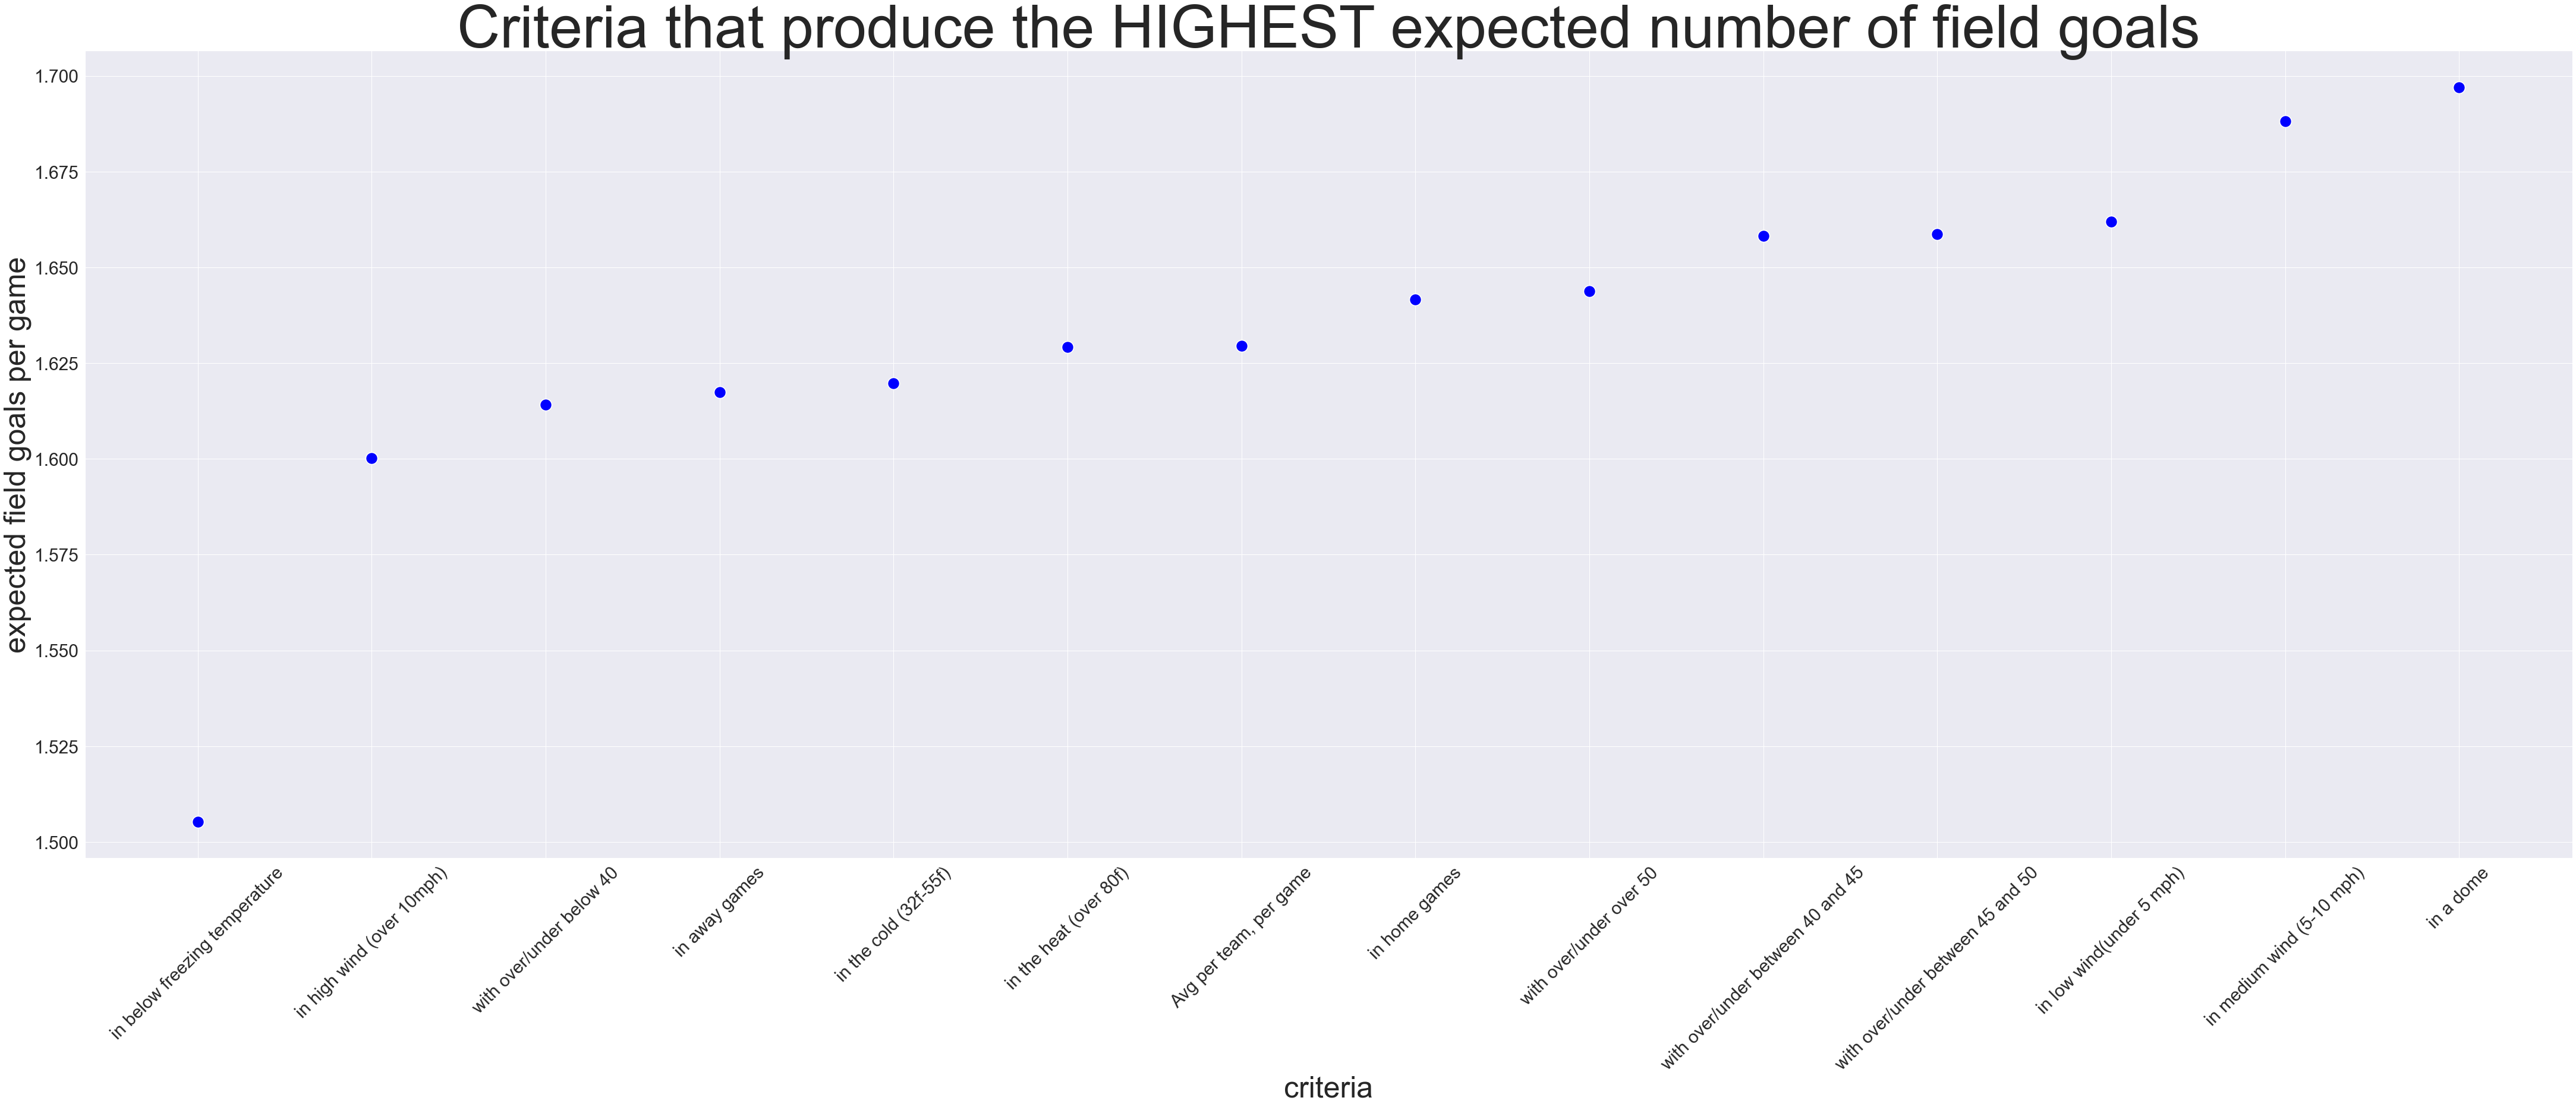

In [835]:
#Visualization of the most favorable criteria

sns.set(rc={'figure.figsize':(75, 25)})
sns.scatterplot(x=results_df['criteria'], y=results_df['expected_fgs'], s=400, color="blue")
plt.title('Criteria that produce the HIGHEST expected number of field goals', fontsize=100)
plt.xlabel('criteria', fontsize=50)
plt.xticks(rotation=45, fontsize=30)
plt.ylabel('expected field goals per game', fontsize=50)
plt.yticks(fontsize=30)
plt.show()

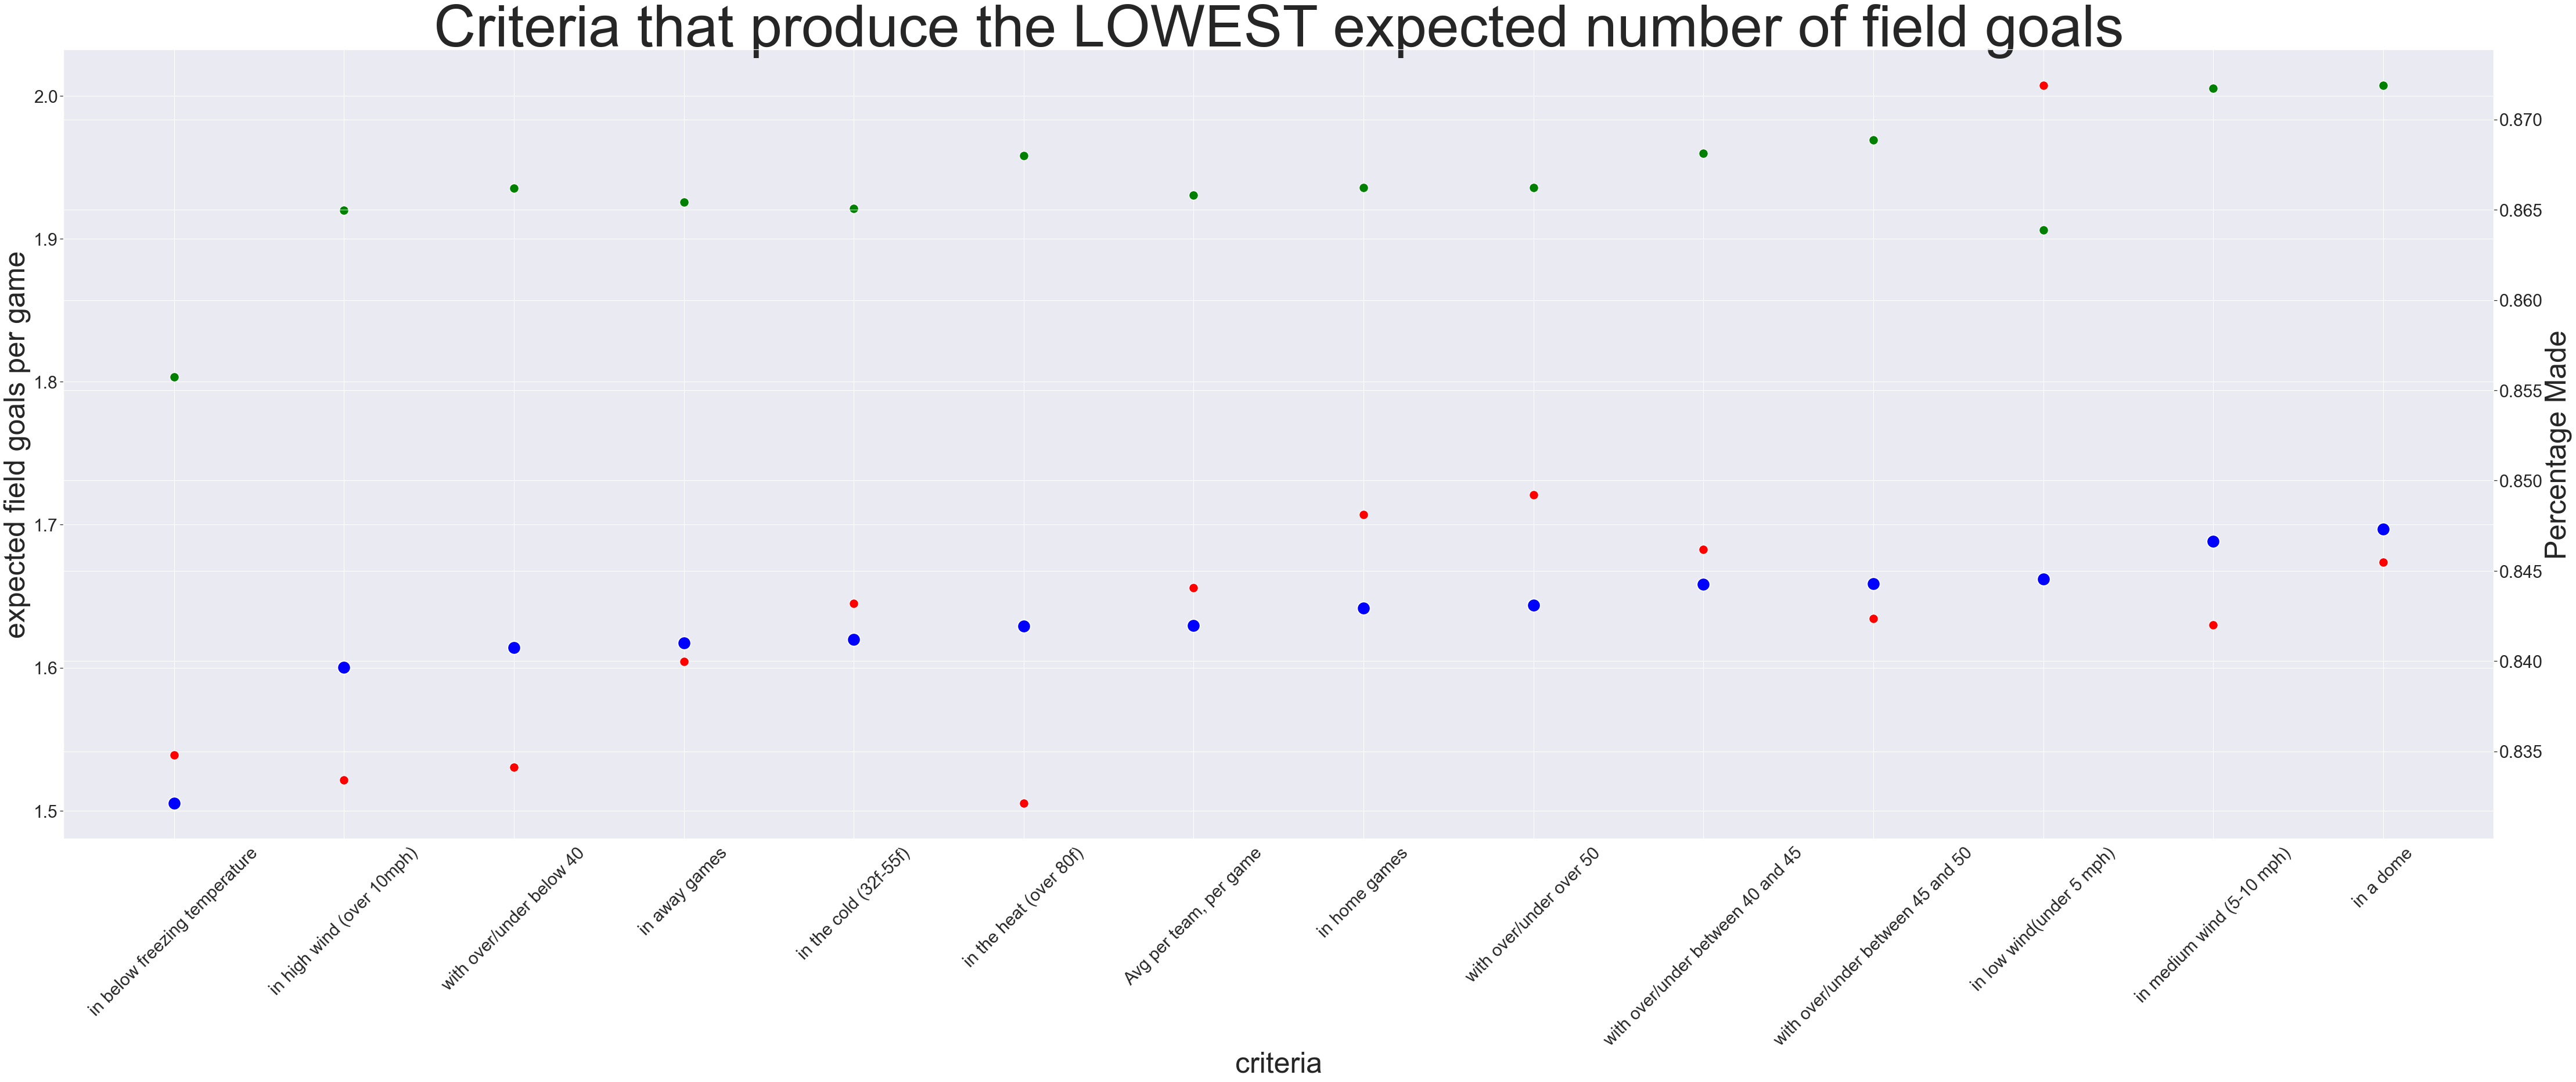

In [864]:
#Criteria of the least favorable criteria
sns.set(rc={'figure.figsize':(75, 25)})
sns.scatterplot(x=results_df['criteria'], y=results_df['expected_fgs'], s=500, color="blue")
plt.title('Criteria that produce the LOWEST expected number of field goals', fontsize=100)
plt.xlabel('criteria', fontsize=50)
plt.xticks(rotation=45, fontsize=30)
plt.ylabel('expected field goals per game', fontsize=50)
plt.yticks(fontsize=30)
ax3 = sns.scatterplot(x=results_df['criteria'], y=results_df['attempts_per_game'], s=250, color="green")
ax2 = plt.twinx()
sns.scatterplot(x=results_df['criteria'], y=results_df['fg_percent'], ax=ax2,  s=250, color="red")
plt.ylabel('Percentage Made', fontsize=50)
plt.yticks(fontsize=30)
plt.show()

In [826]:
#breaking down stadiums by home and away
#
## NOT RETURNING ANY VALUES
#

for i in stadiums:
    if(df['home'].equals(df['off'])):
        compare_for_mass_data("stadium", "==", '"{}"'.format(i), 'at home in "{}"'.format(i))
    
for i in stadiums:
    if(df['home'].equals(df['def'])):
        compare_for_mass_data("stadium", "==", '"{}"'.format(i), "while playing at away at {}".format(i))

In [827]:
#creating a dictionary that holds separate data frames for each year
dict_for_years = {}
for i in years:
    dict_for_years["df_year_" + str(i)] = df[(df.season == i)].copy()
locals().update(dict_for_years)


In [828]:
#printing select sections of the dict_for_years
print("THIS IS 2012")
print(df_year_2012)


THIS IS 2012
      season  week away home                  stadium  temperature  humidity  \
0       2012     1  DAL  NYG          MetLife Stadium         77.0      63.0   
1       2012     1  DAL  NYG          MetLife Stadium         77.0      63.0   
2       2012     1  IND  CHI            Soldier Field         67.0      66.0   
3       2012     1  IND  CHI            Soldier Field         67.0      66.0   
4       2012     1  IND  CHI            Soldier Field         67.0      66.0   
...      ...   ...  ...  ...                      ...          ...       ...   
1047    2012    21  BAL   SF  Mercedes-Benz Superdome         71.0       NaN   
1048    2012    21  BAL   SF  Mercedes-Benz Superdome         71.0       NaN   
1049    2012    21  BAL   SF  Mercedes-Benz Superdome         71.0       NaN   
1050    2012    21  BAL   SF  Mercedes-Benz Superdome         71.0       NaN   
1051    2012    21  BAL   SF  Mercedes-Benz Superdome         71.0       NaN   

      wind_speed wind_dire

In [829]:
print("THIS IS 2016")
print(df_year_2016)
#print(dict_for_years)

THIS IS 2016
      season  week away home                              stadium  \
4150    2016     1  CAR  DEN  Sports Authority Field at Mile High   
4151    2016     1  CAR  DEN  Sports Authority Field at Mile High   
4152    2016     1  CAR  DEN  Sports Authority Field at Mile High   
4153    2016     1  BUF  BAL                     M&T Bank Stadium   
4154    2016     1  BUF  BAL                     M&T Bank Stadium   
...      ...   ...  ...  ...                                  ...   
5195    2016    20  PIT   NE                     Gillette Stadium   
5196    2016    20  PIT   NE                     Gillette Stadium   
5197    2016    20  PIT   NE                     Gillette Stadium   
5198    2016    21   NE  ATL                          NRG Stadium   
5199    2016    21   NE  ATL                          NRG Stadium   

      temperature  humidity  wind_speed wind_direction      condition  ...  \
4150         85.0      12.0        10.0              E          Sunny  ...   
41

In [830]:
for y in years:
    dict_for_years["df_year_{}".format(y)]
    for k in kickers:
        compare_for_mass_data("kicker", "==", '"{}"'.format(k), "{} in {}".format(k, y))

#
### ERROR _ DIV BY 0
#

NameError: name 'compare_for_mass_data' is not defined

In [ ]:
for i in kickers:
    compare_single_criteria("kicker", "==", i, i)
    #break down by year - fix grammar

for i in teams:
    compare_single_criteria('off == "{}"'.format(i), i + " on offense")
    #break down by year - fix grammar

for i in teams:
    compare_single_criteria('def == "{}"'.format(i), "against " + i)
    #break down by year - fix grammar

In [ ]:
#sorting the results
results_df.sort_values(by=['expected_fgs'])

best_df = results_df.head(5)
worst_df = results_df.tail(5)


In [ ]:
sns.lmplot('criteria', 'expected_fgs', data=results_df, fit_reg=False, scatter_kws={"marker": "D", "s": 20}) 

plt.title('Scatter Plot of Data without Regression Line')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.show()



In [ ]:
#
## STILL TO DO
#
#df_kicker_by_year = df[["season", "kicker"]].copy()
#print(df_kicker_by_year.head())
#
# remove outliers
# create graphs